# AVN Getting Started Tutorial

In [2]:
import avn.dataloading
import avn.segmentation

## Simple Segmentation

In this section of the tutorial, I will be segmenting 50 song files from a single bird using MFCC derivative threshold segmentation. First, let's specify the path to the folder containing the song files:


In [3]:
Bird_ID = "G402"
song_folder = "../sample_data/" + Bird_ID + "/"

Now, we will instantiate an MFCCDerivative class object, which we will then use for segmentation. Segmentation using other criteria will differ in terms of which segmenter is used. Currently the options available are RMSE, RMSEDerivative, MFCC and MFCCDerivative. 

In [4]:
segmenter = avn.segmentation.MFCCDerivative()

Now that we've created the segmenter, we can use it to segment the songs in `song_folder`. We must also specify the value of the upper and lower segmentation thresholds. 

In [25]:
seg_data = segmenter.make_segmentation_table(Bird_ID, song_folder, 
                                            upper_threshold = 0.10, 
                                            lower_threshold = -0.1)

`seg_data` is an instance of the avn.segmentation.SegData class. It's `.seg_table` attribute contains a dataframe with the onset and offset times of every syllable, generated by `segmenter`:

In [6]:
seg_data.seg_table.head()

,onsets,offsets,files
0,0.359909,0.522449,G402_43362.23322048_9_19_6_28_42.wav
1,0.522449,0.766259,G402_43362.23322048_9_19_6_28_42.wav
2,0.766259,0.882358,G402_43362.23322048_9_19_6_28_42.wav
3,0.882358,1.021678,G402_43362.23322048_9_19_6_28_42.wav
4,1.021678,1.160998,G402_43362.23322048_9_19_6_28_42.wav


These syllable onset and offset timestamps can be used to extract individual syllables from files for further analyses, like syllable labeling or calculating acoustic features. To save this table locally for future use you can use the following function: 

In [7]:
out_file_dir = "../sample_data/"
seg_data.save_as_csv(out_file_dir)

This will create a file called `[Bird_ID]_seg_table.csv`. In our case, that is "G402_seg_table.csv"

## Threshold Optimization

In the example above, we used an upper_threshold value of 0.1. This threshold generally works well for all zebra finch song, in my experience, but you may want to test other thresholds to see how they compare. 

One way to test different thresholds is to use the avn.segmentation.Plot functions to visualize syllable boundaries over a spectrogram of the song:

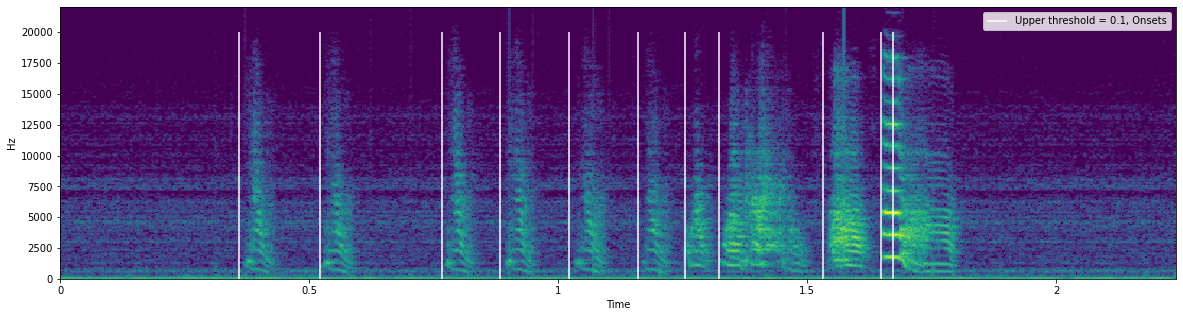

In [29]:
avn.segmentation.Plot.plot_segmentations(seg_data, seg_label = "Upper threshold = 0.1, Onsets")

The white lines in the spectrogram above represent the syllable onset times. Lets see what they would look like if we used a lower upper segmentation threshold: 

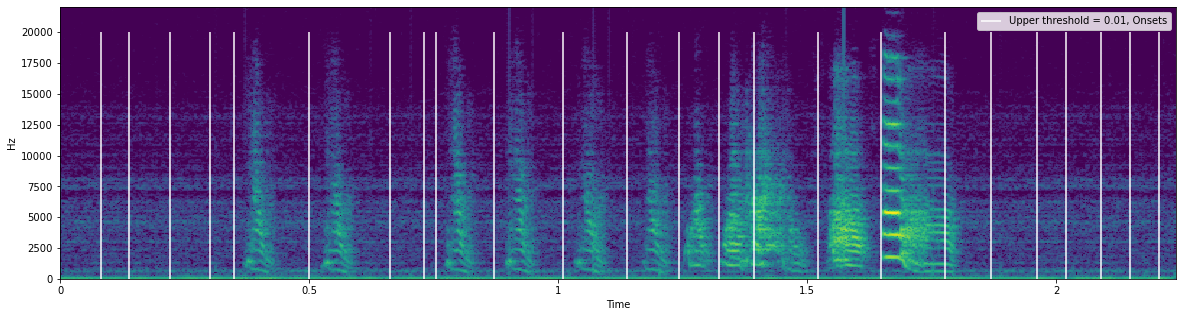

In [20]:
seg_data_001 = segmenter.make_segmentation_table(Bird_ID, song_folder,
                                                upper_threshold = 0.01, 
                                                lower_threshold = -0.01)

avn.segmentation.Plot.plot_segmentations(seg_data_001, seg_label = "Upper threshold = 0.01, Onsets")

It is pretty clear that the segmentation threshold here was too low becuase there are many false positive syllable onset detections. What if we use a much higher upper segmentation threshold:

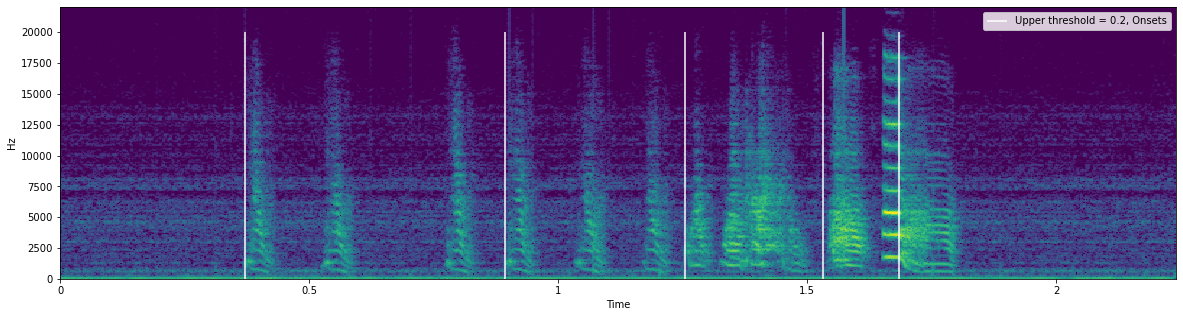

In [30]:
seg_data_02 = segmenter.make_segmentation_table(Bird_ID, song_folder, 
                                               upper_threshold = 0.2, 
                                               lower_threshold = -0.01)
avn.segmentation.Plot.plot_segmentations(seg_data_02, seg_label = "Upper threshold = 0.2, Onsets")

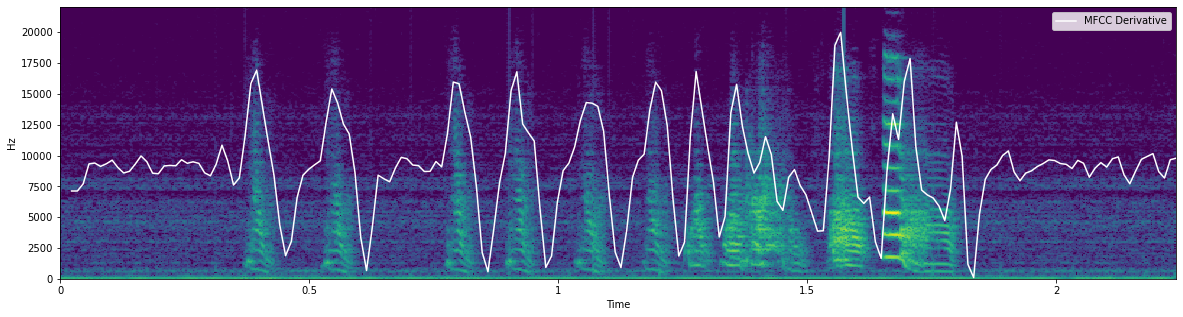

In [21]:
avn.segmentation.Plot.plot_seg_criteria(seg_data, segmenter, "MFCC Derivative")